# 08 Convolutional neural network - RESULTS
---


# Checklist
- [x] ConvNet performance
- [x] Describe results



# METHODS:

## MODEL DEVELOPMENT, SELECTION AND TRANING

In order to clasify swissroad images with best possible accuracy, using denovo trained convnet perform I created created over 1000 ConvNet models, Model, was developed in three steps:   

* Step 1.   
Fast evaluation of different models with different optimizers, activation functions, batch size and hidden layer size. The evaluation on that step was done, mainly by, eye, and manual typing of the different parameters to the function developed for Step 2 and 3 - a function that allowed for grid seach of convNet's created wiht different parameters and data fidding aprpaches.
   
* Step 2.   
I selected "the most promossing parameters", and run grid search on limit amount od data to find the best combination of pasrameters and data treatment approaches for constructing well performing model,
    * four approaches for the data were implemented:   
        * Models were trained using keras image generators, but only raw imaged were used as train data,    
        * Models were trained using keras image generators, and the images were augmented    
        * Raw images were loaded as one batch and then provided to model for training in batches,    
        * Raw images were loaded and augmented with modified keral image generator, and then provided for training in batches,    
   * Following conditions were evaluated:   
        - __different batch size__
            * 10, 20, 32, 64 and 128,
        - __different number of units at the first hidden layer__
            * from 60 to 600
        - __different image resolution__
            * 46x46, 96x96, 112x112, 224x224, and 256x256
   * Other parameters:   
       - based on the results from previous section (08, dense networks) and the results obtained by fast model evaluation in Step 1 I trained the model with the Adam optimizer, and 50% dropout on the hidden layer.  
* Step 3. Finally, I evalueed and compared the results from Step 3, and selected two the most promissig aproaches that were trained with large of augmented images, The results were presented as
    * Final Model 1
    * Final Model 2
   
## NETWORK ARCHITECTURE used in Step 2 and 3
    * briefly:
        - two convolution layers, 
        - each convolutional neural network had max pool layer 
        - flatten layer
        - two fully connected layers. 
    * for more details please see
        basic_cnn_model_with_two_layers() function in basedir/src/utils/cnn_augmented_images_tools
        
        
# RESULTS

## Step 1. __Method and Model architecture selectection__  

In that step I compared cnn networks with one, two and three hidden layers, with different number of hidden units 36-1200, and with SGD and Adam optimizers. the results were not sumarized, but the functions implemented in notebook 08 - Traing - part 1 - Convnets - Using Generators and Raw Images - Running Models allow for testing one and two layer cnn architecture with any set of parameters, that must be simply typed into the dictionary fidded for the function. As the result, I selected cnn with two fully connected layers, 50% dropout, and relu activation function at convolutional and hidden layer. At this step, it was unclear whther raw or augmented data are producting better results, thus there varinats were compared in Step 2. 

## Step 2 __batch, image and augmentation method selection__  
I has benn considerably more difficult to find and train well perfoming de-novo contructed cnn model in comparison to fully connected models trained using features extracted form images wiht imagenet. The best perfomring model, usied in that step had validation accuracy 0.62, and large number of models had accuracy arround 0.5.
* __batch size effect on model accuracy__  
    * in general the model using larger batch size perfomed better then the models usin small batch size, however models with best performance were trained using 64 batch size.  
* __effect of image augmentation on model accuracy__  
    * image augmentation was esential to construct well perfoming cnn models with limited number images that were available in swissroad dataset. As expeted models trained with raw images hgad lower accuracy then the models trained wiht augmented images. However, it was only true for models trained using augmented images that were preloaded to RAM memorya and then provided to fitted models. In that case, the training accuracy curves were less stepp and allowed for longer training period then with the images trained wign keras image generator feeding each batch directly from the file. unfortunatelly, that appraoch was very memory consuming and limited the number of batched that can be created   
* __effect of image size on model accuracy__   
     * I trained models with images from 24x24 pixel size , up to 224x224. Models trained with images with pixel size 24x24 and 46x46 had lower accuracy then the models trained with larger image sizes. there was no large difference in accuracy of model trained with images  with size 96x96, 112x112 and 224x224.

## Step 3. __Trainig final cnn models__    
Here I created only two models called Final Model 1 and Final Model 2. 
These two models were trained using appraoch selected and tested in Step 2, ie. I preloaded large number of augmented images, and fitted the model with two convolution layers and two dense layers. Because, step 2 showed that the models using medium image resulution can be as accurate as the models using high image resution, I used images 96x96 size in Final Model 1 and 112x112 in Final Model 2.  The rsults were 0.68 and 0.74 test accuracy for Final Model 1 and 2 respectively, The summary of model precitions on test images can be found in 08 - Trainig - part 5 and 6 notebooks, with plots showing examples of classified images. 

In [2]:
import os # allow changing, and navigating files and folders, 
import sys
import re # module to use regular expressions, 
import glob # lists names in folders that match Unix shell patterns
import random # functions that use and generate random numbers

import pickle
import warnings
import numpy as np # support for multi-dimensional arrays and matrices
import pandas as pd # library for data manipulation and analysis
import seaborn as sns # advance plots, for statistics, 
import matplotlib as mpl # to get some basif functions, heping with plot mnaking 
import matplotlib.pyplot as plt # for making plots, 

In [41]:
os.chdir(basedir)
sys.path.append(basedir)

# my tools, loaded only form basedir, 
from src.utils.data_loaders import load_encoded_imgbatch_using_logfile, load_raw_img_batch, load_raw_img_batch_with_custom_datagen
from src.utils.example_plots_after_clustering import plot_img_examples, create_spaces_between_img_clusters, plot_img_examples_from_dendrogram
from src.utils.annotated_pie_charts import annotated_pie_chart_with_class_and_group, prepare_img_classname_and_groupname
from src.utils.tools_for_plots import create_class_colors_dict
from src.utils.feature_extraction_tools import encode_images, create_augmented_images
from src.utils.logreg_tools import my_logredCV, plot_examples_with_predictions_and_proba, plot_examples_with_predictions_and_proba_gamma
from src.utils.random_forest import random_forest_grid_search, plot_random_tree_summary_andor_table
from src.utils.model_summary_plots import plot_grid_acc_and_return_summary_df, visual_model_summary
from src.utils.SVM_tools import SVM_grid_search, plot_grid_acc_and_return_summary_df
from src.utils.tools_for_plots import create_class_colors_dict
from src.utils.model_summary_plots import plot_grid_acc_and_return_summary_df, visual_model_summary, model_gridsearch_summary_plots
from src.utils.knn_tools import knn_grid_search
from src.utils.dense_networks_tools import create_keras_one_layer_dense_model, create_keras_two_layer_dense_model, denseNN_grid_search, plot_NN_loss_acc
from src.utils.example_plots import plot_example_images_with_datagenerator
from src.utils.cnn_tools import plot_NN_loss_acc, create_convNN, cnn_gridSearch

# Show table with all cnn models, sorted by validation accuracy results

In [67]:
# sort summary table and present it, 
features_to_display = list(summary_df.columns)
features_to_display = [
            "model_ID","module",
            "model_acc_train","model_acc_valid", "model_acc_test", 
            "img_size_category", "img_size", "fit__batch_size", "dense_one__units", "optimizer"]
df_sorted = summary_df.sort_values("model_acc_valid", ascending=False).loc[:,features_to_display]
display(df_sorted.head(100))

,model_ID,module,model_acc_train,model_acc_valid,model_acc_test,img_size_category,img_size,fit__batch_size,dense_one__units,optimizer
0,0,cnn Final_Model_2,0.795759,0.726619,0.74,112,"(112, 112)",64.0,360.0,Adam
0,0,cnn Final_Model_1,0.828000,0.661870,0.68,96,"(96, 96)",64.0,360.0,Adam
1,1,cnn generator_augmented_images,0.762065,0.633880,0.42,112,"(112, 112)",64.0,60.0,Adam
0,0,cnn raw_images,0.817857,0.625899,0.48,46,"(46, 46)",32.0,360.0,Adam
1,1,cnn raw_images,0.867857,0.597122,0.52,46,"(46, 46)",64.0,360.0,Adam
2,2,cnn augmented_images,0.812500,0.594245,0.58,96,"(96, 96)",128.0,360.0,Adam
1,1,cnn augmented_images,0.764286,0.593525,0.50,96,"(96, 96)",64.0,360.0,Adam
2,2,cnn generator_augmented_images,0.892256,0.590164,0.36,112,"(112, 112)",32.0,600.0,Adam
11,11,cnn generator_augmented_images,0.915825,0.590164,0.46,112,"(112, 112)",64.0,600.0,Adam
4,4,cnn augmented_images,0.779464,0.588130,0.46,46,"(46, 46)",64.0,360.0,Adam


# Plot accuracy results of cnn models compared in task 09, Step 2 and 3.

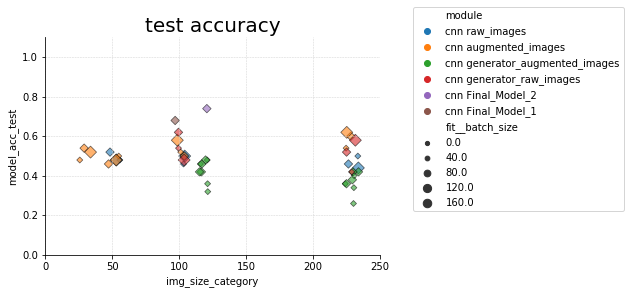

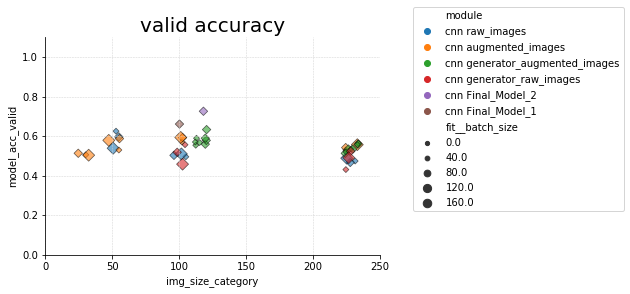

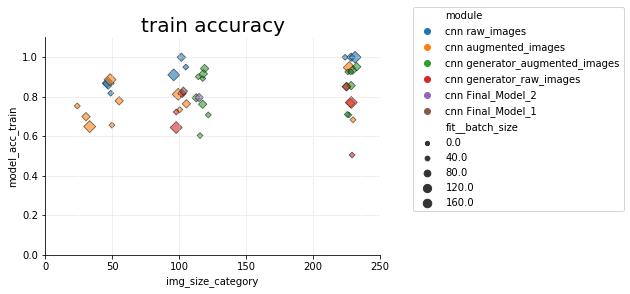

In [63]:
dtypes=["test", "valid", "train"]
for dtype in dtypes:
    # add small gaussian noise to img_ size to see all points better
    summary_df_copy = summary_df.copy()
    summary_df_copy.img_size_category  = summary_df.img_size_category.values+(np.random.sample(summary_df.shape[0])*10)
    
    # plot
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=summary_df_copy,
        y=f"model_acc_{dtype}", x="img_size_category", hue="module", size="fit__batch_size", alpha=0.6, marker="D", legend="brief", edgecolor="black")
    plt.title(f"{dtype} accuracy", fontsize=20)
    plt.ylim(0,1.1)
    plt.xlim(0, 250)
    plt.grid(color="lightgrey", ls="--", lw=0.5)
    sns.despine()
    plt.legend(frameon=True, loc=(1.1, 0.2))

# Show loss and accuracy history for 10 best performing models

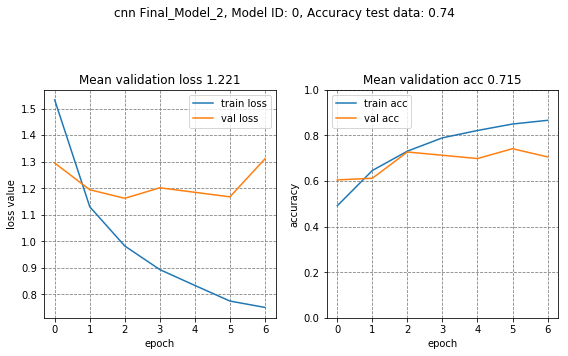

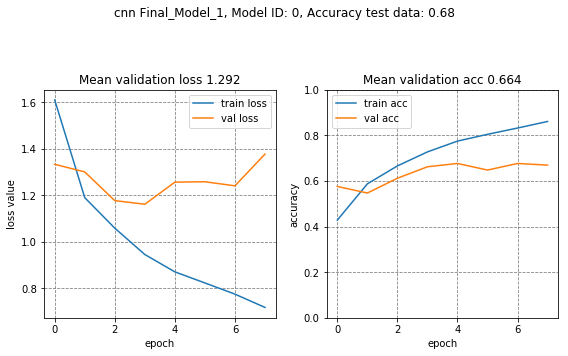

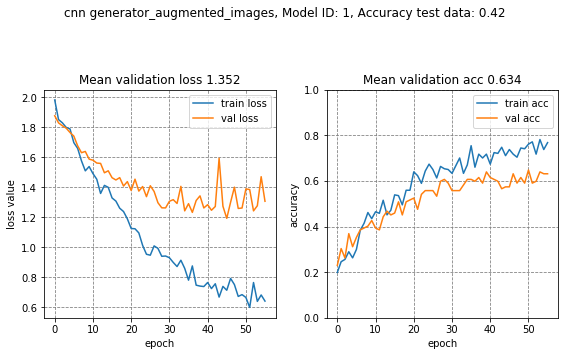

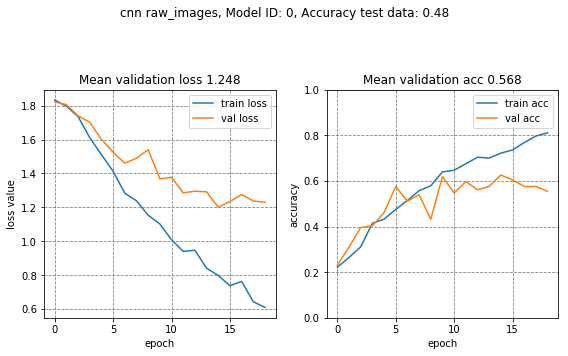

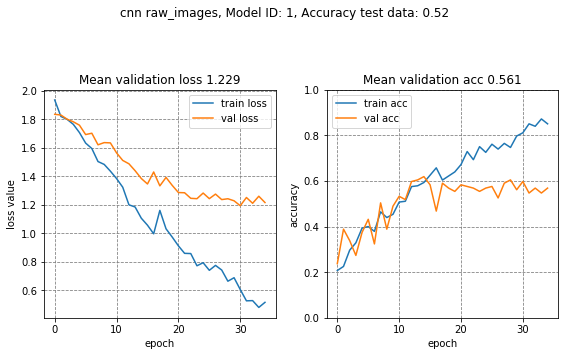

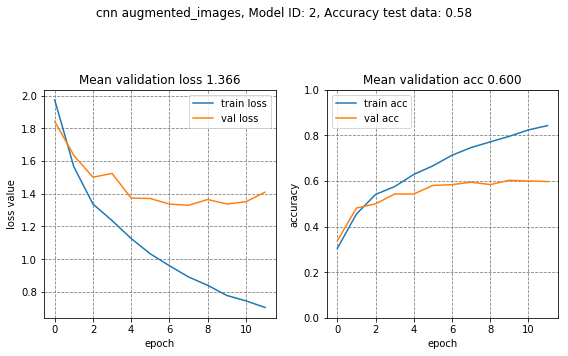

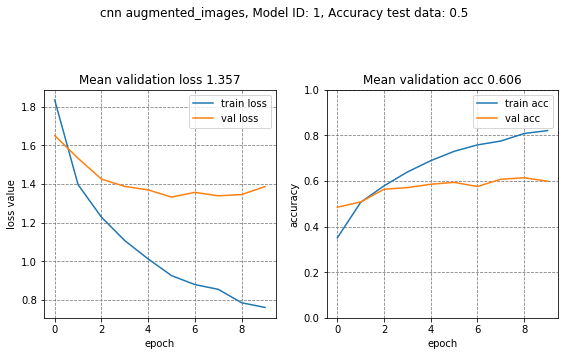

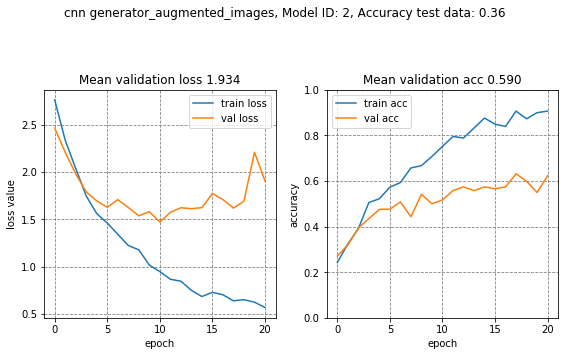

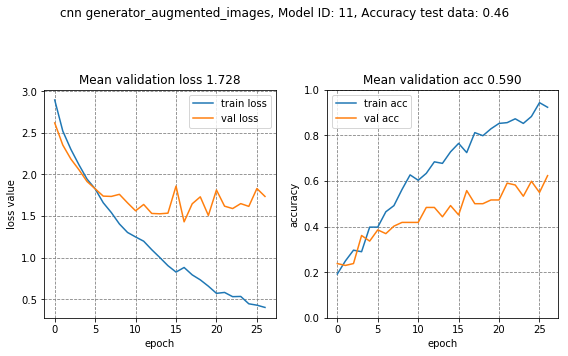

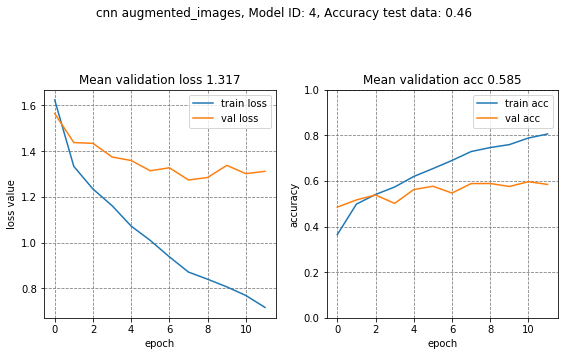

In [64]:
# .. plot loss and accuracy values history over epoch
summary_df_copy = summary_df.sort_values("model_acc_valid", ascending=False)
for n in range(10):
        
    one_module_name          =  summary_df_copy.original_module_name.iloc[n]
    one_module_name_for_plot =  summary_df_copy.module.iloc[n]
    one_model_ID             =  summary_df_copy.model_ID.iloc[n]
        
    # Load data:
    os.chdir(PATH_results)
    with open(f"{task_name}__{one_module_name}__{dataset_name}__model_history_dict.p", 'rb') as file: # wb - write binary,
        model_history_dict  = pickle.load(file)    
    with open(f"{task_name}__{one_module_name}__{dataset_name}__model_predictions_dict.p", 'rb') as file: # wb - write binary,
        model_predictions_dict  = pickle.load(file)    
    
    # extract the data
    test_acc_results = model_predictions_dict[one_model_ID]["test"]['acc_restuls_and_params']["model_acc_test"]        
        
    plot_NN_loss_acc(
            title=f"{one_module_name_for_plot}, Model ID: {one_model_ID}, Accuracy test data: {str(np.round(test_acc_results,3))}",
            model_history_df=model_history_dict[one_model_ID]['model_history'], 
            n_mean=3,
            figsize=(8,5),
            top=0.75
        )